[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
{'b_ss': array([ 0.06610199,  0.13560418,  0.20864143,  0.28535398,  0.36588764,
        0.45039401,  0.53903075,  0.63196177,  0.72935753,  0.83139525,
        0.93825921,  1.05014103,  1.16723996,  1.28976317,  1.41792607,
        1.55195267,  1.69207586,  1.83853782,  1.99159037,  2.15149535,
        2.31852501,  2.49296245,  2.67510202,  2.86524981,  3.06372407,
        3.27085572,  3.48698886,  3.71248127,  3.94770499,  4.19304685,
        4.44890907,  4.7157099 ,  4.99388421,  5.28388421,  5.58618007,
        5.90126071,  6.22963446,  6.57182994,  6.92839676,  7.29990642,
        7.68695317,  8.09015491,  8.51015413,  8.94761888,  9.40324381,
        9.87775122, 

C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
{'b_ss': array([ 0.11348275,  0.24005496,  0.37987077,  0.53308773,  0.69986688,
        0.88037284,  1.0747738 ,  1.28324164,  1.50595197,  1.74308418,
        1.99482154,  2.26135123,  2.54286442,  2.83955636,  3.15162639,
        3.47927809,  3.82271928,  4.18216214,  4.55782326,  4.94992373,
        5.35868922,  5.78435003,  6.2271412 ,  6.68730259,  7.16507895,
        7.66072   ,  8.17448055,  8.70662056,  9.25740521,  9.82710504,
       10.41599602, 11.02435963, 11.65248297, 12.30065888, 12.96918599,
       13.65836887, 14.3685181 , 15.09995041, 15.85298874, 16.6279624 ,
       17.42520715, 16.99019573, 16.55535744, 16.12063424, 15.68596749,
       15.25129796,

Text(0.5, 1.0, 'cons  early ret')

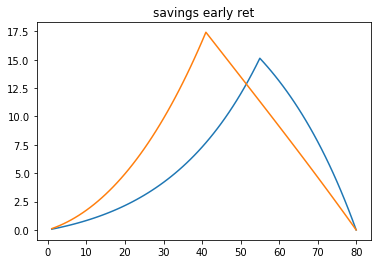

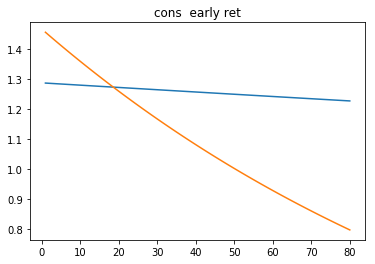

In [2]:
import numpy as np
import scipy.optimize as opt
import time
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, "C:\\Users\\utabo\\Documents\\GitHub\\BootCamp2019\\ProblemSets\\ECON\\Week 4")
import params3 as p

#==================================================================================#
def get_K(b,p):
    K=sum(b)
    return K
def get_L(n,p):
    L=sum(n)
    return L

def get_r(L,K,p):
    r=p.alpha*p.A*(L/K)**(1-p.alpha)-p.delta
    return r

def get_w(L,K,p):
    w=(1-p.alpha)*p.A*(K/L)**(p.alpha)
    return w

def get_C(n,w,r,b,p):
    c=np.zeros(p.S)
    c[0]=w*n[0]-b[0]
    for ss in range(0,p.S-2):
        c[ss+1]=w*n[ss+1]+(1+r)*b[ss]-b[ss+1]
    c[p.S-1]=w*n[p.S-1]+(1+r)*b[p.S-2]
    return c


def margu(c,p):
    marg=c**(-p.sigma)
    return marg

#======================================================================#
#start_time = time.clock() # Place at beginning of get_SS()
def euler(b,n,p):
    k=get_K(b,p)
    l=get_L(n,p)
    r=get_r(l,k,p)
    w=get_w(l,k,p)
    c=get_C(n,w,r,b,p)
    err1=np.empty(p.S-1)
    for s in range(0,p.S-1):
        err1[s]=p.beta*(1+r)*margu(c[s+1],p)-margu(c[s],p)
    return err1

def get_SS(bvec_guess, nvec,p):
    start_time = time.clock()
    b_ss= opt.root(euler, bvec_guess,args=(nvec,p), tol = 1e-10)
    l=get_L(nvec,p)
    k_ss=get_K(b_ss.x,p)
    r_ss=get_r(l,k_ss,p)
    w_ss=get_w(l,k_ss,p)
    c_ss=get_C(nvec,w_ss,r_ss,b_ss.x,p)
    Y_ss=c_ss+p.delta*k_ss
    errs=euler(b_ss.x,nvec,p)
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss.x, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': k_ss, 'Y_ss': Y_ss, 'EulErr_ss': errs,'ss_time': ss_time}
    return ss_output


p.S=80
p.beta=0.96
p.delta=0.05
p.sigma=3
p.A=1
p.alpha=0.35


nvec=np.ones(p.S)
for tt in range(p.S):
    if tt>54:
        nvec[tt]=0.2
print(nvec)
bvec_guess = np.ones(p.S-1)*0.15

ss=get_SS(bvec_guess, nvec,p)
print(ss)


timevec=np.linspace(1,p.S,p.S)
savings_ss=np.append(ss['b_ss'],[0])
plt.figure(0)
plt.plot(timevec,savings_ss,label="savings")
plt.title("savings")
plt.figure(1)
plt.plot(timevec, ss['c_ss'],label="cons")
plt.title("cons")
######################################################
#Early retirement
nvec=np.ones(p.S)
for tt in range(p.S):
    if tt>40:
        nvec[tt]=0.2
print(nvec)
bvec_guess = np.ones(p.S-1)*0.15

ss=get_SS(bvec_guess, nvec,p)
print(ss)


timevec=np.linspace(1,p.S,p.S)
savings_ss=np.append(ss['b_ss'],[0])
plt.figure(0)
plt.plot(timevec,savings_ss,label="savings")
plt.title("savings early ret")
plt.figure(1)
plt.plot(timevec, ss['c_ss'],label="cons")
plt.title("cons  early ret")
